# Data Wargling (Join)
# => # => (inner, outer, left, right)
# => df.join()
# => df.merge()
# => pd.concat()

# Group by
# => df.groupby(by)
# => unstact
# => pivot_Table

# Handling Missing Values

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.DataFrame({"CNIC": np.random.randint(1,20, size=20),
                   "Account No":np.random.randint(1,5, size=(20))})

df1.drop_duplicates(inplace=True)
df1
#12345-1234567-3
#1234512345673

CNIC  Account No
0      9           1
1      8           2
2     17           3
3     10           2
4     11           1
5     19           4
6      4           4
7      3           4
8     16           2
9      8           4
10    10           3
11    19           2
13    12           4
14    10           1
15    15           1
16     7           3

In [3]:
df2 = pd.DataFrame({"CNIC": np.random.randint(1,20, size=(20)),
                   "Account No":np.random.randint(1,5, size=(20)),
                   "Mobile No":np.random.randint(2001,3000, size=(20)),
                  "DOB":pd.date_range('1990-01-01', periods=20, freq="M"),
                  "CustomerName":[chr(x) for x in np.random.randint(65,91, size=(20))],
                   "Gender":np.random.choice(["M","F"], size=(20))})
df2

CNIC  Account No  Mobile No        DOB CustomerName Gender
0     16           4       2200 1990-01-31            M      M
1      2           3       2583 1990-02-28            C      M
2     16           1       2590 1990-03-31            T      F
3     17           4       2487 1990-04-30            S      F
4     19           1       2974 1990-05-31            Q      M
5      9           2       2405 1990-06-30            O      F
6     15           3       2537 1990-07-31            B      M
7      6           3       2098 1990-08-31            Y      F
8     19           2       2941 1990-09-30            S      M
9     10           1       2183 1990-10-31            D      M
10     9           1       2327 1990-11-30            B      F
11    19           3       2947 1990-12-31            X      F
12     1           4       2190 1991-01-31            O      F
13    11           1       2409 1991-02-28            Y      F
14    16           3       2752 1991-03-31            C      F
15     3           2       2153 1991-04-30            Q      M
16     4           4       2079 1991-05-31            K      M
17    12           3       2960 1991-06-30            Q      F
18     5           4       2899 1991-07-31            S      F
19    12           4       2044 1991-08-31            P      M

In [4]:
df2.columns[np.in1d(df2.columns,df1.columns)]

Index(['CNIC', 'Account No'], dtype='object')

In [5]:
df2[df2.CNIC==4]

CNIC  Account No  Mobile No        DOB CustomerName Gender
16     4           4       2079 1991-05-31            K      M

In [6]:
print(df1.dtypes, df2.dtypes, sep="\n\n\n")

CNIC          int64
Account No    int64
dtype: object


CNIC                     int64
Account No               int64
Mobile No                int64
DOB             datetime64[ns]
CustomerName            object
Gender                  object
dtype: object


columnNameSameInBothDataframes
Name(optional), datatype, data_pattern

#data_frame_left.merge(dataframe_right, on="columnNameSameInBothDataframes", how="typeofJoin")
#typeofJoin=inner,outer,left,right

#data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

#data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

#if columns name differents in both table 

#data_frame_left.merge(dataframe_right, left_on="col", right_on="col", how="typeofJoin")

#data_frame_left.merge(dataframe_right, left_index=True, right_index=True, how='outer')



data_frame_left.merge(dataframe_right, on="columnNameSameInBothDataframes", how="typeofJoin")

In [7]:
a = df1.merge(df2, on="CNIC", how='inner')
print(len(df1))
print(len(df2))
print(len(a))
a

16
20
21


CNIC  Account No_x  Account No_y  Mobile No        DOB CustomerName Gender
0      9             1             2       2405 1990-06-30            O      F
1      9             1             1       2327 1990-11-30            B      F
2     17             3             4       2487 1990-04-30            S      F
3     10             2             1       2183 1990-10-31            D      M
4     10             3             1       2183 1990-10-31            D      M
5     10             1             1       2183 1990-10-31            D      M
6     11             1             1       2409 1991-02-28            Y      F
7     19             4             1       2974 1990-05-31            Q      M
8     19             4             2       2941 1990-09-30            S      M
9     19             4             3       2947 1990-12-31            X      F
10    19             2             1       2974 1990-05-31            Q      M
11    19             2             2       2941 1990-09-30            S      M
12    19             2             3       2947 1990-12-31            X      F
13     4             4             4       2079 1991-05-31            K      M
14     3             4             2       2153 1991-04-30            Q      M
15    16             2             4       2200 1990-01-31            M      M
16    16             2             1       2590 1990-03-31            T      F
17    16             2             3       2752 1991-03-31            C      F
18    12             4             3       2960 1991-06-30            Q      F
19    12             4             4       2044 1991-08-31            P      M
20    15             1             3       2537 1990-07-31            B      M

### data_frame_left.merge(dataframe_right, on=[col1,col2,col3], how="typeofJoin")

In [8]:
a = df1.merge(df2, on=["CNIC","Account No"], how="inner") #Join with multiples columns
print(len(df1))
print(len(df2))
print(len(a))
a

16
20
6


CNIC  Account No  Mobile No        DOB CustomerName Gender
0     9           1       2327 1990-11-30            B      F
1    11           1       2409 1991-02-28            Y      F
2     4           4       2079 1991-05-31            K      M
3    19           2       2941 1990-09-30            S      M
4    12           4       2044 1991-08-31            P      M
5    10           1       2183 1990-10-31            D      M

##### data_frame_left.merge(dataframe_right, left_on="col", right_on="col", how="typeofJoin")

In [9]:
df1.columns

Index(['CNIC', 'Account No'], dtype='object')

In [10]:
df1.columns = ['Customer CNIC', 'Customer Account No']
df1.head(2)

Customer CNIC  Customer Account No
0              9                    1
1              8                    2

In [11]:
df2.head(2)

CNIC  Account No  Mobile No        DOB CustomerName Gender
0    16           4       2200 1990-01-31            M      M
1     2           3       2583 1990-02-28            C      M

In [12]:
a = df1.merge(df2, left_on="Customer CNIC", right_on="CNIC")
a

Customer CNIC  Customer Account No  CNIC  Account No  Mobile No  \
0               9                    1     9           2       2405   
1               9                    1     9           1       2327   
2              17                    3    17           4       2487   
3              10                    2    10           1       2183   
4              10                    3    10           1       2183   
5              10                    1    10           1       2183   
6              11                    1    11           1       2409   
7              19                    4    19           1       2974   
8              19                    4    19           2       2941   
9              19                    4    19           3       2947   
10             19                    2    19           1       2974   
11             19                    2    19           2       2941   
12             19                    2    19           3       2947   
13              4                    4     4           4       2079   
14              3                    4     3           2       2153   
15             16                    2    16           4       2200   
16             16                    2    16           1       2590   
17             16                    2    16           3       2752   
18             12                    4    12           3       2960   
19             12                    4    12           4       2044   
20             15                    1    15           3       2537   

          DOB CustomerName Gender  
0  1990-06-30            O      F  
1  1990-11-30            B      F  
2  1990-04-30            S      F  
3  1990-10-31            D      M  
4  1990-10-31            D      M  
5  1990-10-31            D      M  
6  1991-02-28            Y      F  
7  1990-05-31            Q      M  
8  1990-09-30            S      M  
9  1990-12-31            X      F  
10 1990-05-31            Q      M  
11 1990-09-30            S      M  
12 1990-12-31            X      F  
13 1991-05-31            K      M  
14 1991-04-30            Q      M  
15 1990-01-31            M      M  
16 1990-03-31            T      F  
17 1991-03-31            C      F  
18 1991-06-30            Q      F  
19 1991-08-31            P      M  
20 1990-07-31            B      M

In [13]:
a = df1.merge(df2, left_on=["Customer CNIC","Customer Account No"], right_on=["CNIC","Account No"])
a

Customer CNIC  Customer Account No  CNIC  Account No  Mobile No        DOB  \
0              9                    1     9           1       2327 1990-11-30   
1             11                    1    11           1       2409 1991-02-28   
2              4                    4     4           4       2079 1991-05-31   
3             19                    2    19           2       2941 1990-09-30   
4             12                    4    12           4       2044 1991-08-31   
5             10                    1    10           1       2183 1990-10-31   

  CustomerName Gender  
0            B      F  
1            Y      F  
2            K      M  
3            S      M  
4            P      M  
5            D      M

In [14]:
a[["CNIC","CustomerName","Mobile No"]]

CNIC CustomerName  Mobile No
0     9            B       2327
1    11            Y       2409
2     4            K       2079
3    19            S       2941
4    12            P       2044
5    10            D       2183

##### data_frame_left.merge(dataframe_right, left_index=True, right_index=True, how='outer')


In [15]:
customers = pd.DataFrame({"Customers NIC": [14,6,19,22],"Customer Name":["A","B","C","D"]})


transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(20)),
                   "TransactionID":np.random.randint(1,2, size=(20)),
                  "Transaction Date":pd.date_range('1990-01-01', periods=20, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(20)),
                            "Amount":np.random.randint(1,1000000, size=(20))})


customers

Customers NIC Customer Name
0             14             A
1              6             B
2             19             C
3             22             D

In [16]:
transactions

CNIC  TransactionID Transaction Date Description  Amount
0     14              1       1990-01-31          FT  705838
1     14              1       1990-02-28        IBFT  323884
2     14              1       1990-03-31        IBFT  319957
3      6              1       1990-04-30       TopUP  361059
4     21              1       1990-05-31          FT  512637
5     14              1       1990-06-30       TopUP  681337
6     14              1       1990-07-31        IBFT  408976
7     19              1       1990-08-31       TopUP  637302
8     21              1       1990-09-30       TopUP  884942
9     19              1       1990-10-31          FT  934200
10     6              1       1990-11-30          FT  825986
11    19              1       1990-12-31        IBFT  361579
12    19              1       1991-01-31       TopUP  502927
13    19              1       1991-02-28       TopUP  368434
14    21              1       1991-03-31       TopUP  871384
15    14              1       1991-04-30       TopUP   56611
16    14              1       1991-05-31       TopUP   77381
17    19              1       1991-06-30          FT  106937
18    21              1       1991-07-31        IBFT  775216
19     6              1       1991-08-31          FT  215869

In [17]:
def fee_charges(x):
  if x>=1 and x<=100000:
    return 10
  elif x>100000 and x<=1000000:
    return 50
  else:
    return 100

transactions['fee'] = transactions.Amount.apply(fee_charges)
transactions

CNIC  TransactionID Transaction Date Description  Amount  fee
0     14              1       1990-01-31          FT  705838   50
1     14              1       1990-02-28        IBFT  323884   50
2     14              1       1990-03-31        IBFT  319957   50
3      6              1       1990-04-30       TopUP  361059   50
4     21              1       1990-05-31          FT  512637   50
5     14              1       1990-06-30       TopUP  681337   50
6     14              1       1990-07-31        IBFT  408976   50
7     19              1       1990-08-31       TopUP  637302   50
8     21              1       1990-09-30       TopUP  884942   50
9     19              1       1990-10-31          FT  934200   50
10     6              1       1990-11-30          FT  825986   50
11    19              1       1990-12-31        IBFT  361579   50
12    19              1       1991-01-31       TopUP  502927   50
13    19              1       1991-02-28       TopUP  368434   50
14    21              1       1991-03-31       TopUP  871384   50
15    14              1       1991-04-30       TopUP   56611   10
16    14              1       1991-05-31       TopUP   77381   10
17    19              1       1991-06-30          FT  106937   50
18    21              1       1991-07-31        IBFT  775216   50
19     6              1       1991-08-31          FT  215869   50

In [18]:
c = transactions.CNIC.value_counts()
print(c.index)
print(c.values)
print()
print(c)

Int64Index([14, 19, 21, 6], dtype='int64')
[7 6 4 3]

14    7
19    6
21    4
6     3
Name: CNIC, dtype: int64


In [19]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='left')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a.sort_values(by=["Transaction counts"], ascending=False, inplace=True)
a

Customers NIC Customer Name  Transaction counts
0             14             A                 7.0
2             19             C                 6.0
1              6             B                 3.0
3             22             D                 NaN

In [20]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='right')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

Customers NIC Customer Name  Transaction counts
0.0             14             A                   7
1.0              6             B                   3
2.0             19             C                   6
NaN             21           NaN                   4

In [21]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='inner')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

Customers NIC Customer Name  Transaction counts
0             14             A                   7
1              6             B                   3
2             19             C                   6

In [22]:
a = customers.merge(c, left_on="Customers NIC", right_index=True, how='outer')
a.columns = ['Customers NIC', 'Customer Name', 'Transaction counts']
a

Customers NIC Customer Name  Transaction counts
0.0             14             A                 7.0
1.0              6             B                 3.0
2.0             19             C                 6.0
3.0             22             D                 NaN
NaN             21           NaN                 4.0

# Slabs
* pd.cut(series)
* pd.qcut(series)

In [23]:
transactions.head(2)

CNIC  TransactionID Transaction Date Description  Amount  fee
0    14              1       1990-01-31          FT  705838   50
1    14              1       1990-02-28        IBFT  323884   50

In [24]:
slabs = [1,10000,50000,100000,500000,99000000]
pd.cut(transactions.Amount,slabs).value_counts()

(500000, 99000000]    10
(100000, 500000]       8
(50000, 100000]        2
(10000, 50000]         0
(1, 10000]             0
Name: Amount, dtype: int64

In [25]:
slabs = [0, 0.6, 0.8, .95, 1]
pd.qcut(transactions.Amount,slabs).value_counts()

(56610.999, 562503.0]    12
(562503.0, 785370.0]      4
(785370.0, 887404.9]      3
(887404.9, 934200.0]      1
Name: Amount, dtype: int64

# Group by

In [26]:
#dataframeName.groupby("Col").agg([count])             optional(min,max,avg,sum, std)(int,float)
#dataframeName.groupby(by="Col")[["colname"]].agg([count]) 
#dataframeName.groupby(by=[col1,col2,..]).agg([count]) 

In [27]:
transactions = pd.DataFrame({"CNIC": np.random.choice([14,6,19,21], size=(20)),
                   "TransactionID":np.random.randint(1,2, size=(20)),
                  "Transaction Date":pd.date_range('1990-01-01', periods=20, freq="M"),
                   "Description":np.random.choice(["TopUP","IBFT","FT"], size=(20)),
                            "Amount":np.random.randint(1,1000000, size=(20)),
                            "City":np.random.choice(["Karachi","Islamabad","Lahore"], size=(20))})



transactions

CNIC  TransactionID Transaction Date Description  Amount       City
0      6              1       1990-01-31        IBFT  388659  Islamabad
1     19              1       1990-02-28       TopUP  518194     Lahore
2     19              1       1990-03-31       TopUP  331117     Lahore
3     21              1       1990-04-30        IBFT  424347     Lahore
4     21              1       1990-05-31       TopUP  300911     Lahore
5     21              1       1990-06-30          FT  216411  Islamabad
6     21              1       1990-07-31       TopUP  665233    Karachi
7     19              1       1990-08-31       TopUP   60254  Islamabad
8     19              1       1990-09-30          FT  356677     Lahore
9     21              1       1990-10-31        IBFT  320080    Karachi
10     6              1       1990-11-30       TopUP  377948     Lahore
11     6              1       1990-12-31       TopUP  720491     Lahore
12     6              1       1991-01-31          FT  803120  Islamabad
13    21              1       1991-02-28       TopUP   71327  Islamabad
14    14              1       1991-03-31          FT   73969     Lahore
15    19              1       1991-04-30          FT  514759    Karachi
16    14              1       1991-05-31          FT    6945  Islamabad
17     6              1       1991-06-30       TopUP  202462    Karachi
18     6              1       1991-07-31       TopUP   97682    Karachi
19    21              1       1991-08-31        IBFT  313658    Karachi

In [28]:
a = transactions.groupby("City").agg(['count'])
a

CNIC TransactionID Transaction Date Description Amount
          count         count            count       count  count
City                                                             
Islamabad     6             6                6           6      6
Karachi       6             6                6           6      6
Lahore        8             8                8           8      8

In [29]:
a = transactions.groupby("City")[["CNIC"]].agg(['count'])
a

CNIC
          count
City           
Islamabad     6
Karachi       6
Lahore        8

In [30]:
a = transactions.groupby("City")[["City"]].agg(['count'])
a

City
          count
City           
Islamabad     6
Karachi       6
Lahore        8

In [31]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std])
a

count     min     max           mean            std
City      Description                                                     
Islamabad FT               3    6945  803120  342158.666667  412714.204275
          IBFT             1  388659  388659  388659.000000            NaN
          TopUP            2   60254   71327   65790.500000    7829.793388
Karachi   FT               1  514759  514759  514759.000000            NaN
          IBFT             2  313658  320080  316869.000000    4541.039749
          TopUP            3   97682  665233  321792.333333  302007.170015
Lahore    FT               2   73969  356677  215323.000000  199904.743896
          IBFT             1  424347  424347  424347.000000            NaN
          TopUP            5  300911  720491  449732.200000  172748.105957

In [32]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std,'sum']).reset_index()
a = a.sort_values(by=["City",'count'], ascending=[True,False])
a.to_excel("output.xlsx", index=False)

In [33]:
a = transactions.groupby(["City","Description"]).Amount.agg(['count',min,max, np.mean, np.std]).unstack()
a

count                min                     max                  \
Description    FT IBFT TopUP      FT    IBFT   TopUP      FT    IBFT   TopUP   
City                                                                           
Islamabad       3    1     2    6945  388659   60254  803120  388659   71327   
Karachi         1    2     3  514759  313658   97682  514759  320080  665233   
Lahore          2    1     5   73969  424347  300911  356677  424347  720491   

                      mean                                     std  \
Description             FT      IBFT          TopUP             FT   
City                                                                 
Islamabad    342158.666667  388659.0   65790.500000  412714.204275   
Karachi      514759.000000  316869.0  321792.333333            NaN   
Lahore       215323.000000  424347.0  449732.200000  199904.743896   

                                         
Description         IBFT          TopUP  
City                                     
Islamabad            NaN    7829.793388  
Karachi      4541.039749  302007.170015  
Lahore               NaN  172748.105957

Categorical data/nominal data
'orange','mango'


ordinal data
1,3,2,4 (discreate/countinues)
A,B,C
a,b,c
i,ii,iii

In [34]:
a = input("Enter no")
a.split(",")



Enter noa


['a']

In [35]:
list(str('232'))

['2', '3', '2']

In [36]:
transactions.groupby([transactions['Transaction Date'].dt.year, "City","CNIC"]).agg(['count'])

TransactionID Transaction Date Description  \
                                        count            count       count   
Transaction Date City      CNIC                                              
1990             Islamabad 6                1                1           1   
                           19               1                1           1   
                           21               1                1           1   
                 Karachi   21               2                2           2   
                 Lahore    6                2                2           2   
                           19               3                3           3   
                           21               2                2           2   
1991             Islamabad 6                1                1           1   
                           14               1                1           1   
                           21               1                1           1   
                 Karachi   6                2                2           2   
                           19               1                1           1   
                           21               1                1           1   
                 Lahore    14               1                1           1   

                                Amount  
                                 count  
Transaction Date City      CNIC         
1990             Islamabad 6         1  
                           19        1  
                           21        1  
                 Karachi   21        2  
                 Lahore    6         2  
                           19        3  
                           21        2  
1991             Islamabad 6         1  
                           14        1  
                           21        1  
                 Karachi   6         2  
                           19        1  
                           21        1  
                 Lahore    14        1

In [37]:
transactions.head()

CNIC  TransactionID Transaction Date Description  Amount       City
0     6              1       1990-01-31        IBFT  388659  Islamabad
1    19              1       1990-02-28       TopUP  518194     Lahore
2    19              1       1990-03-31       TopUP  331117     Lahore
3    21              1       1990-04-30        IBFT  424347     Lahore
4    21              1       1990-05-31       TopUP  300911     Lahore

count           
Description    FT IBFT TopUP
City                        
Islamabad       3    1     2
Karachi         1    2     3
Lahore          2    1     5

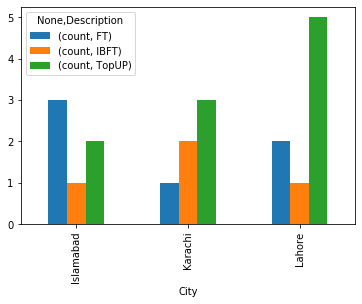

In [52]:
a = transactions.groupby(["City","Description"]).\
TransactionID.agg(['count']).unstack()

a.plot(kind='bar')
a

In [51]:
b = transactions.pivot_table(index="City", columns="Description", aggfunc=["count",'sum'])
b

count                                                         \
            Amount            CNIC            Transaction Date              
Description     FT IBFT TopUP   FT IBFT TopUP               FT IBFT TopUP   
City                                                                        
Islamabad        3    1     2    3    1     2                3    1     2   
Karachi          1    2     3    1    2     3                1    2     3   
Lahore           2    1     5    2    1     5                2    1     5   

                           ...            sum                             \
            TransactionID  ...         Amount                  CNIC        
Description            FT  ... TopUP       FT    IBFT    TopUP   FT IBFT   
City                       ...                                             
Islamabad               3  ...     2  1026476  388659   131581   41    6   
Karachi                 1  ...     3   514759  633738   965377   19   42   
Lahore                  2  ...     5   430646  424347  2248661   33   21   

                                            
                  TransactionID             
Description TopUP            FT IBFT TopUP  
City                                        
Islamabad      40             3    1     2  
Karachi        33             1    2     3  
Lahore         71             2    1     5  

[3 rows x 21 columns]